<a href="https://colab.research.google.com/github/rvsvhy/Machine-Learning/blob/main/Machine_Learning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

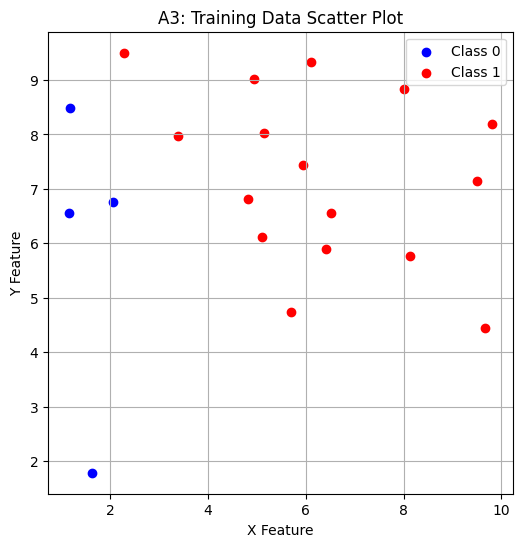

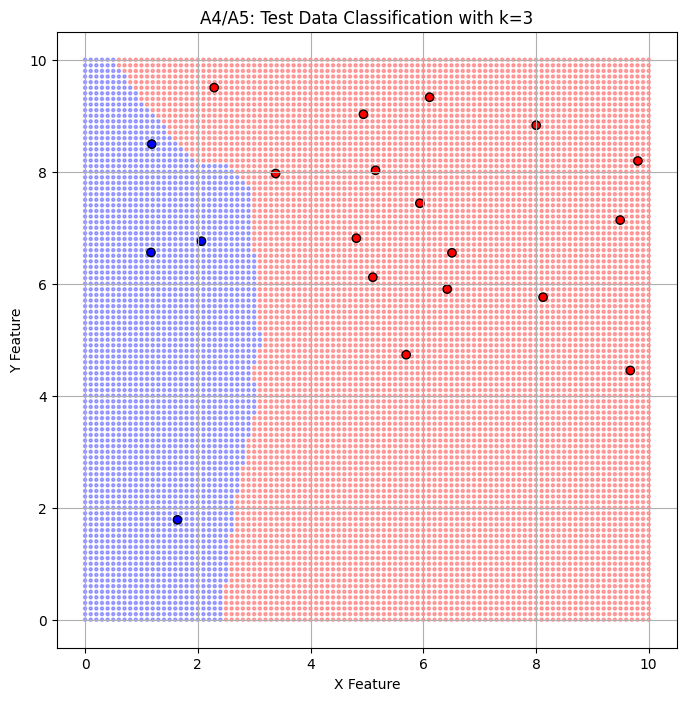

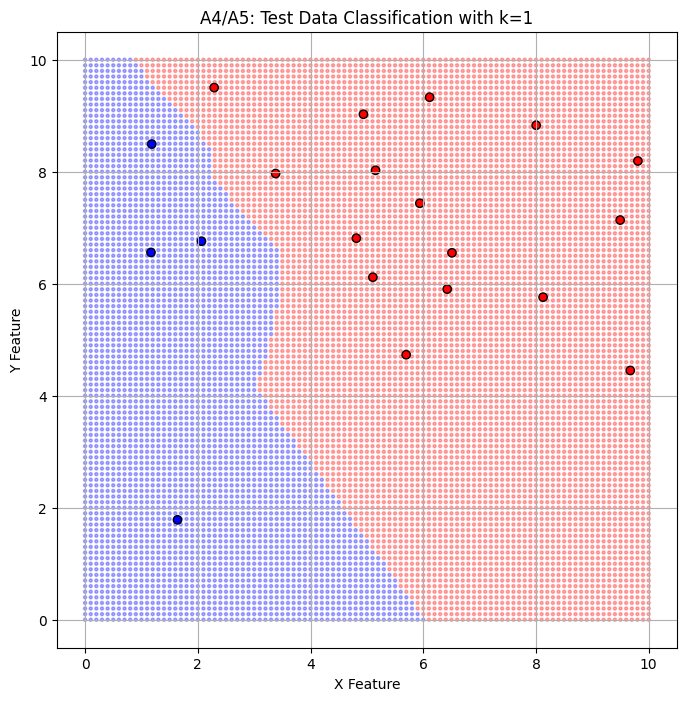

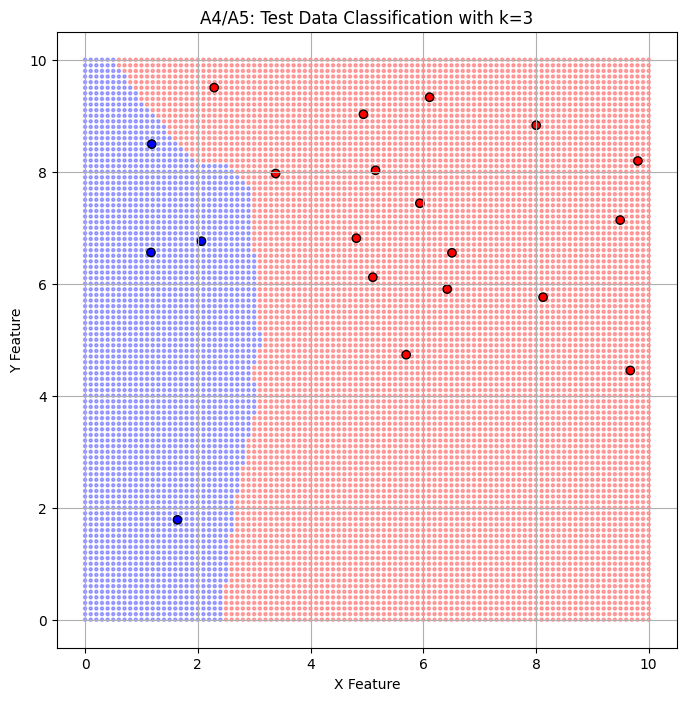

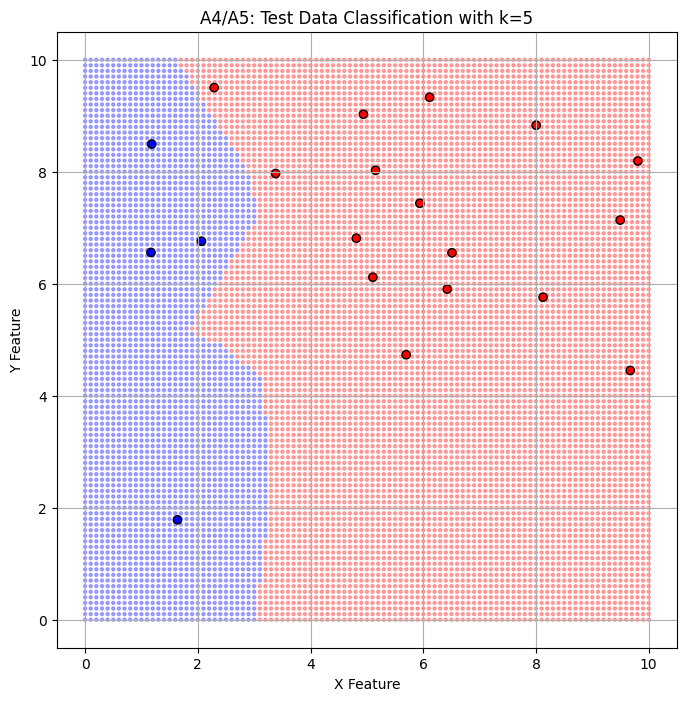

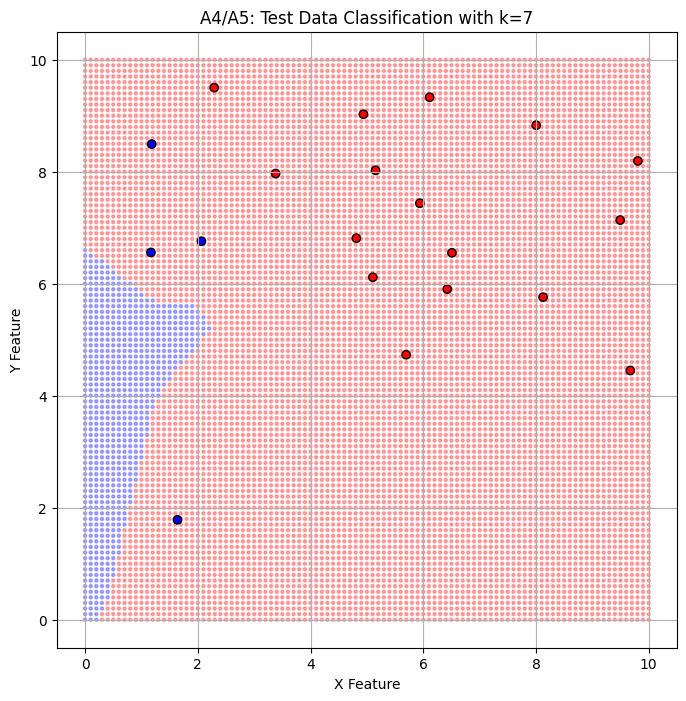

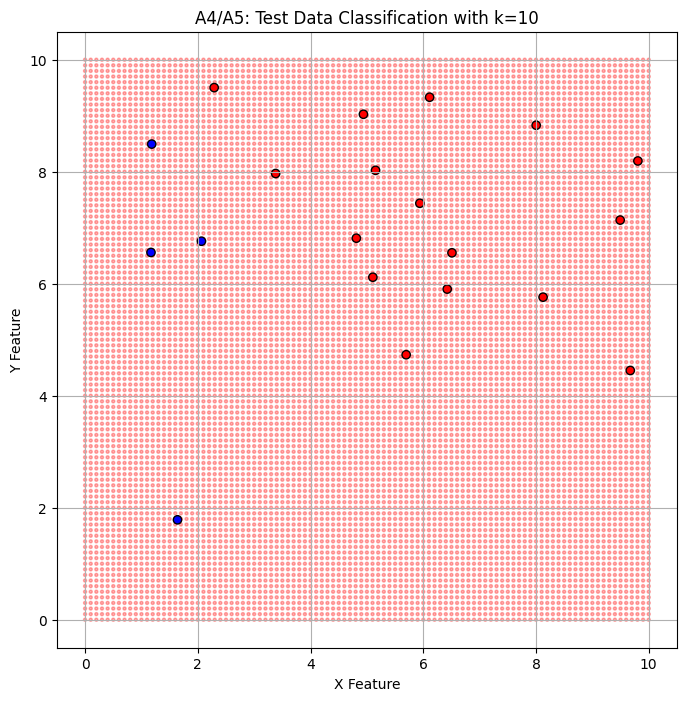

THE ANSWER FOR A6: 

Training Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20548
           1       0.99      0.99      0.99     20469

    accuracy                           0.99     41017
   macro avg       0.99      0.99      0.99     41017
weighted avg       0.99      0.99      0.99     41017


Testing Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8750
           1       0.99      0.99      0.99      8829

    accuracy                           0.99     17579
   macro avg       0.99      0.99      0.99     17579
weighted avg       0.99      0.99      0.99     17579


A7: Best K value found: {'n_neighbors': 2}
The answer fork A1: 

Training Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20548
           1       1.00      0.99      1.00     20469

    accuracy                           1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# A1 - Evaluate Confusion Matrix & Metrics
# -----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("\nTraining Metrics:")
    print(classification_report(y_train, y_train_pred, zero_division=0))

    print("\nTesting Metrics:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# -----------------------------
# A2 - Regression Evaluation for Payment Prediction
# -----------------------------
def load_regression_data(filepath):
    df = pd.read_excel(filepath, sheet_name="Purchase data")
    df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
    y = df['Payment (Rs)']
    return X, y

def evaluate_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mape, r2


# -----------------------------
# A3 - Generate & Plot Training Data
# -----------------------------
def generate_training_data():
    np.random.seed(0)
    X_train = np.random.uniform(1, 10, (20, 2))
    y_train = (X_train[:, 0] + X_train[:, 1] > 10).astype(int)

    plt.figure(figsize=(6, 6))
    for cls, color in zip([0, 1], ['blue', 'red']):
        plt.scatter(X_train[y_train == cls][:, 0], X_train[y_train == cls][:, 1], c=color, label=f'Class {cls}')
    plt.title("A3: Training Data Scatter Plot")
    plt.xlabel("X Feature")
    plt.ylabel("Y Feature")
    plt.legend()
    plt.grid(True)
    plt.show()

    return X_train, y_train

# -----------------------------
# A4 & A5 - kNN Classification and Visualization
# -----------------------------
def classify_and_plot(X_train, y_train, k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    xx, yy = np.meshgrid(x_test, y_test)
    test_data = np.c_[xx.ravel(), yy.ravel()]

    predicted = clf.predict(test_data)

    plt.figure(figsize=(8, 8))
    plt.scatter(test_data[:, 0], test_data[:, 1], c=['blue' if p == 0 else 'red' for p in predicted], alpha=0.3, s=5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=['blue' if y == 0 else 'red' for y in y_train], edgecolors='k')
    plt.title(f"A4/A5: Test Data Classification with k={k}")
    plt.xlabel("X Feature")
    plt.ylabel("Y Feature")
    plt.grid(True)
    plt.show()

# -----------------------------
# A6 - kNN Classification on Project Data
# -----------------------------
def project_data_knn(X_project, y_project, k):
    X_train, X_test, y_train, y_test = train_test_split(X_project, y_project, test_size=0.3, random_state=42)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test)

# -----------------------------
# A7 - Hyperparameter Tuning (Grid Search)
# -----------------------------
def find_best_k(X_train, y_train):
    param_grid = {'n_neighbors': [int(i) for i in range(1, 21)]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("\nA7: Best K value found:", grid_search.best_params_)
    return grid_search.best_estimator_

# -----------------------------
# MAIN
# -----------------------------
if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv("/content/drive/MyDrive/Obfuscated-MalMem2022.csv")

    # Use clean features + binary label
    df = df[['pslist.avg_threads', 'handles.nhandles', 'Class']].dropna()

    # Encode 'Class' (Benign -> 0, Malware -> 1)
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])
    X_project = df[['pslist.avg_threads', 'handles.nhandles']].values
    y_class = df['Class'].values

    # A3
    X_train_simple, y_train_simple = generate_training_data()

    # A4
    classify_and_plot(X_train_simple, y_train_simple, k=3)

    # A5
    for k in [1, 3, 5, 7, 10]:
        classify_and_plot(X_train_simple, y_train_simple, k)

    # A6 - kNN on project data
    print("THE ANSWER FOR A6: ")
    project_data_knn(X_project, y_class, k=3)

    # A7 - GridSearch to find best k
    best_model = find_best_k(X_project, y_class)

    # A1 - Evaluate using best model
    print("The answer fork A1: ")
    X_train, X_test, y_train, y_test = train_test_split(X_project, y_class, test_size=0.3, random_state=42)
    evaluate_model(best_model, X_train, y_train, X_test, y_test)

    # A2 - Regression: Payment Prediction Evaluation
    print("Running A2: Evaluating Payment Prediction using Regression...\n")
    X_reg, y_reg = load_regression_data("/content/drive/MyDrive/Lab Session Data.xlsx")
    mse, rmse, mape, r2 = evaluate_regression_model(X_reg, y_reg)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R² Score:", r2)
